### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [105]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [106]:
ncdc_covid_data1 =pd.read_html('https://covid19.ncdc.gov.ng/')
ncdc_covid_data = ncdc_covid_data1[0]

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [107]:
#JOHN HOPKINS GLOBAL DATA CONFIRMED CASES = JHGDCC
JHGDCC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [108]:
#JOHN HOPKINS GLOBAL DATA RECOVERED CASES = JHGDRC
JHGDRC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [109]:
#JOHN HOPKINS GLOBAL DATA DEATH CASES =JHGDDC
JHGDDC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [110]:
#NIGERIA DAILY DEATH CASES
JHGDDC.loc[JHGDDC['Country/Region']=='Nigeria'].T.tail()

,203
5/6/22,3143
5/7/22,3143
5/8/22,3143
5/9/22,3143
5/10/22,3143


In [111]:
#NIGERIA DAILY CONFIRMED CASES
JHGDCC.loc[JHGDCC['Country/Region']=='Nigeria'].T.tail()

,203
5/6/22,255766
5/7/22,255766
5/8/22,255766
5/9/22,255766
5/10/22,255802


In [112]:
#NIGERIA DAILY RECOVERED CASES
JHGDRC.loc[JHGDRC['Country/Region']=='Nigeria'].T.tail()

,188
5/6/22,0
5/7/22,0
5/8/22,0
5/9/22,0
5/10/22,0


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [113]:
covid_external = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv')
Budget_data = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv')
RealGDP= pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv')
covidNig = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [114]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [115]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [116]:
Budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [117]:
Budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [118]:
RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [119]:
RealGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [120]:
covidNig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [121]:
covidNig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [122]:
covidNig.describe()

,No. of Deaths
count,37.000000
mean,33.000000
std,41.797794
min,2.000000
25%,11.000000
50%,21.000000
75%,36.000000
max,236.000000


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [123]:
ncdc_covid_data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,99378,547,98062,769
1,FCT,28660,36,28376,248
2,Rivers,16677,32,16491,154
3,Kaduna,11278,1,11188,89
4,Plateau,10253,2,10176,75


In [124]:
covidNig['No. of Cases (Lab Confirmed)'] = covidNig['No. of Cases (Lab Confirmed)'].str.replace(',' , '').astype(float)
covidNig['No. of Cases (on admission)'] = covidNig['No. of Cases (on admission)'].str.replace(',' , '').astype(float)
covidNig['No. Discharged'] = covidNig['No. Discharged'].str.replace(',' , '').astype(float)

In [125]:
covidNig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [126]:
#NIGERIA DAILY CONFIRMED CASES
Nigeria_daily_confirmed1 = JHGDCC.loc[JHGDCC['Country/Region']=='Nigeria'].T

In [127]:
Nigeria_daily_confirmed = Nigeria_daily_confirmed1.iloc[4: , :]
Nigeria_daily_confirmed.head()

,203
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [128]:
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_confirmed.reset_index(inplace=True)
Nigeria_daily_confirmed.rename(columns = {'index' : 'Date' , 203:'Cases'} , inplace = True)

In [129]:
#FIRST FIVE DATAPOINTS OF NIGERIA DAILY CONFIRMED CASES AND DATE:
Nigeria_daily_confirmed.head()

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [130]:
Nigeria_daily_confirmed.tail()

,Date,Cases
835,5/6/22,255766
836,5/7/22,255766
837,5/8/22,255766
838,5/9/22,255766
839,5/10/22,255802


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [131]:
#NIGERIA DAILY RECOVERED CASES
Nigeria_daily_recovered1 = JHGDRC.loc[JHGDRC['Country/Region']=='Nigeria'].T

In [132]:
Nigeria_daily_recovered1.head()

,188
Province/State,NaN
Country/Region,Nigeria
Lat,9.082
Long,8.6753
1/22/20,0


In [133]:
Nigeria_daily_recovered = Nigeria_daily_recovered1.iloc[4: , :]
Nigeria_daily_recovered.head()

,188
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [134]:
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_recovered.reset_index(inplace=True)
Nigeria_daily_recovered.rename(columns = {'index' : 'Date' , 188:'Cases'} , inplace=True)

In [135]:
#FIRST FIVE DATAPOINTS OF NIGERIA DAILY RECOVERED
Nigeria_daily_recovered.head()

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [136]:
#LAST FIVE DATAPOINTS OF NIGERIA DAILY RECOVERED
Nigeria_daily_recovered.tail()

,Date,Cases
835,5/6/22,0
836,5/7/22,0
837,5/8/22,0
838,5/9/22,0
839,5/10/22,0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [137]:
#NIGERIA DAILY DEATH CASES
Nigeria_daily_death1 = JHGDDC.loc[JHGDDC['Country/Region']=='Nigeria'].T

In [138]:
Nigeria_daily_death1.head()

,203
Province/State,NaN
Country/Region,Nigeria
Lat,9.082
Long,8.6753
1/22/20,0


In [139]:
Nigeria_daily_death = Nigeria_daily_death1.iloc[4: , :]
Nigeria_daily_death.head()

,203
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [140]:
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_death.reset_index(inplace=True)
Nigeria_daily_death.rename(columns = {'index' : 'Date' , 203:'Cases'} , inplace=True)

In [141]:
#FIRST FIVE DATAPOINTS OF NIGERIA DAILY DEATH
Nigeria_daily_death.head()

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [142]:
#LAST FIVE DATAPOINTS OF NIGERIA DAILY DEATH
Nigeria_daily_death.tail()

,Date,Cases
835,5/6/22,3143
836,5/7/22,3143
837,5/8/22,3143
838,5/9/22,3143
839,5/10/22,3143


In [143]:
Nigeria_daily_death.describe()

,Date,Cases
count,840,840
unique,840,470
top,1/22/20,0
freq,1,61


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [144]:
ncdc_covid_data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,99378,547,98062,769
1,FCT,28660,36,28376,248
2,Rivers,16677,32,16491,154
3,Kaduna,11278,1,11188,89
4,Plateau,10253,2,10176,75


In [145]:
covidNig.head(10)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46
5,Rivers,3279.0,232.0,2987.0,60
6,Edo,2768.0,52.0,2603.0,113
7,Ogun,2382.0,174.0,2175.0,33
8,Kano,2032.0,198.0,1778.0,56
9,Delta,1843.0,57.0,1737.0,49


The top ten states interms of confirmed cases are: 
Lagos , FCT , Kaduna , Plateau , Oyo , Rivers , Edo , Ogun , Kano and Delta

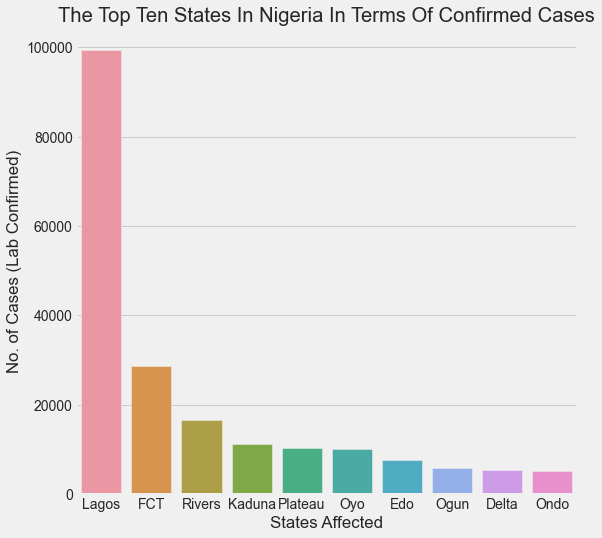

In [146]:
data =plt.subplots(figsize=(8, 8))
sns.barplot(x ='States Affected' ,y ='No. of Cases (Lab Confirmed)' ,  
            data = ncdc_covid_data.sort_values('No. of Cases (Lab Confirmed)' , ascending = False).head(10)).set_title('The Top Ten States In Nigeria In Terms Of Confirmed Cases')
plt.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

Text(0.5, 1.0, 'Top 10 States In Terms Of Discharged Covid Cases')

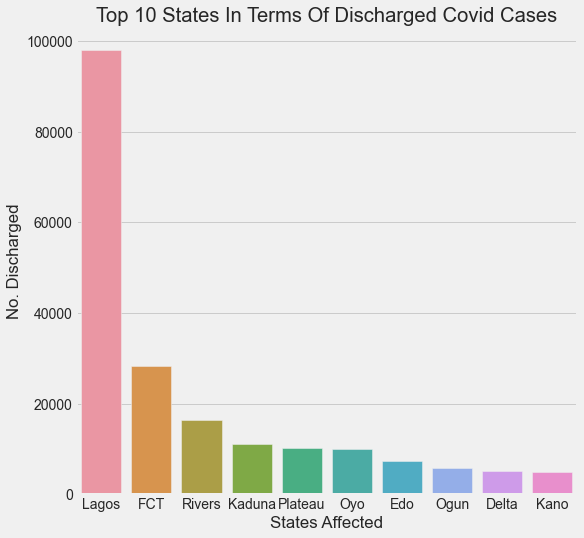

In [147]:
data = plt.subplots(figsize=(8,8))
sns.barplot(x ='States Affected' , y='No. Discharged' , 
            data = ncdc_covid_data.sort_values('No. Discharged', ascending = False).head(10)).set_title('Top 10 States In Terms Of Discharged Covid Cases')

TODO D - Plot the top 10 Death cases

Text(0.5, 1.0, 'Top 10 States In Terms Of Death Cases')

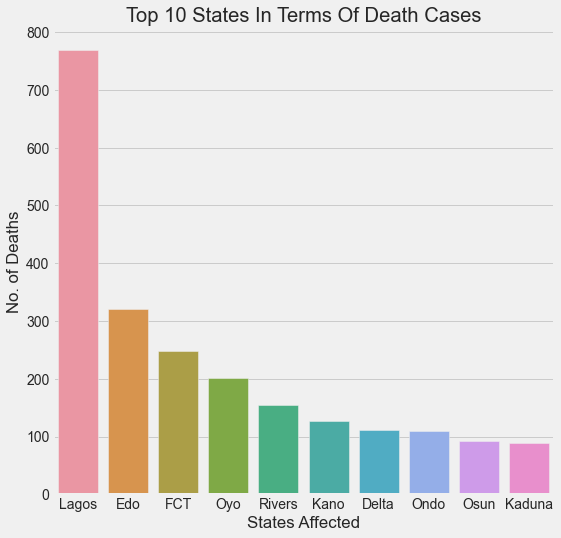

In [148]:
data = plt.subplots(figsize=(8,8))
sns.barplot(x ='States Affected' , y='No. of Deaths' , 
            data = ncdc_covid_data.sort_values('No. of Deaths', ascending = False).head(10)).set_title('Top 10 States In Terms Of Death Cases')

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

Text(0.5, 1.0, 'Daily Confirmed Cases In Nigeria According to Dates')

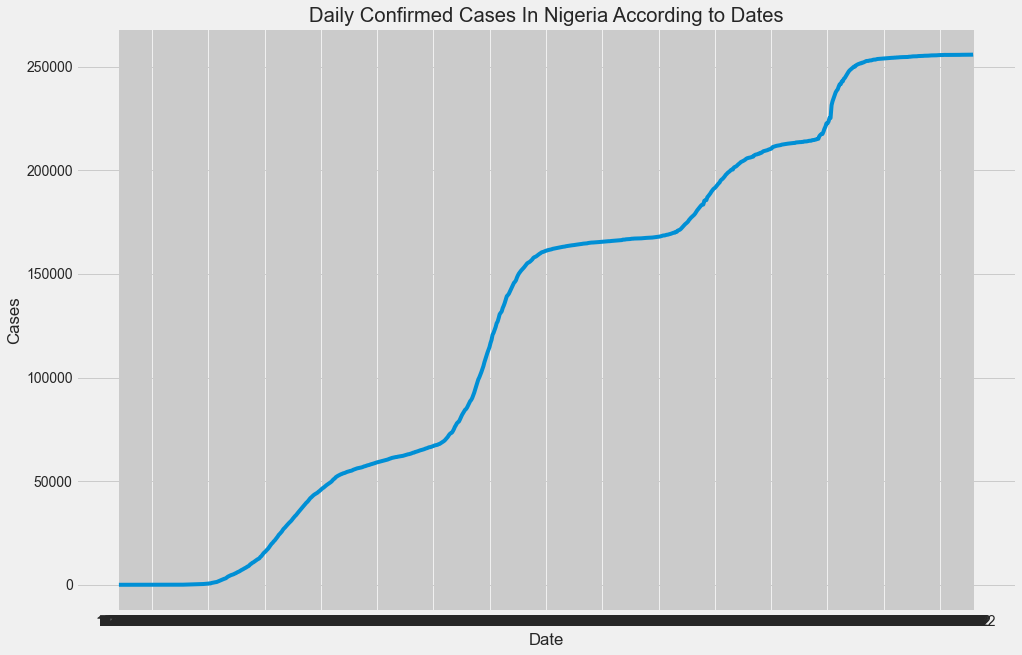

In [149]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(y='Cases' , x = 'Date' ,data = Nigeria_daily_confirmed).set_title('Daily Confirmed Cases In Nigeria According to Dates')

Text(0.5, 1.0, 'Cummulative Daily Recovered Cases Of Covid Cases In Nigeria')

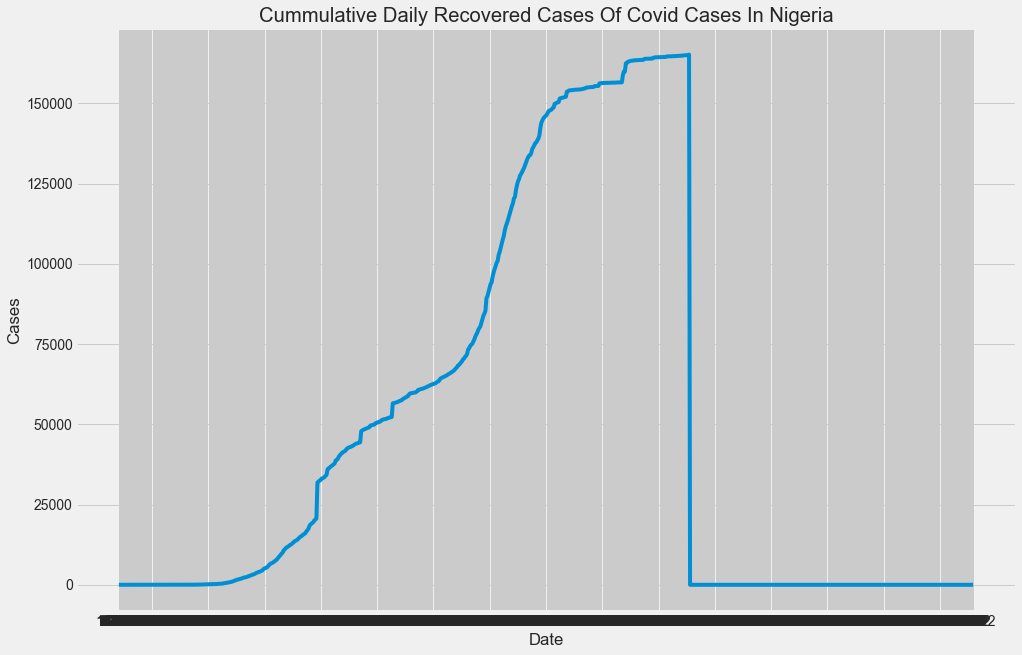

In [150]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(x= 'Date' , y = 'Cases' ,data = Nigeria_daily_recovered).set_title('Cummulative Daily Recovered Cases Of Covid Cases In Nigeria')

Text(0.5, 1.0, 'Cummulative Daily Death Cases Of Covid Cases In Nigeria')

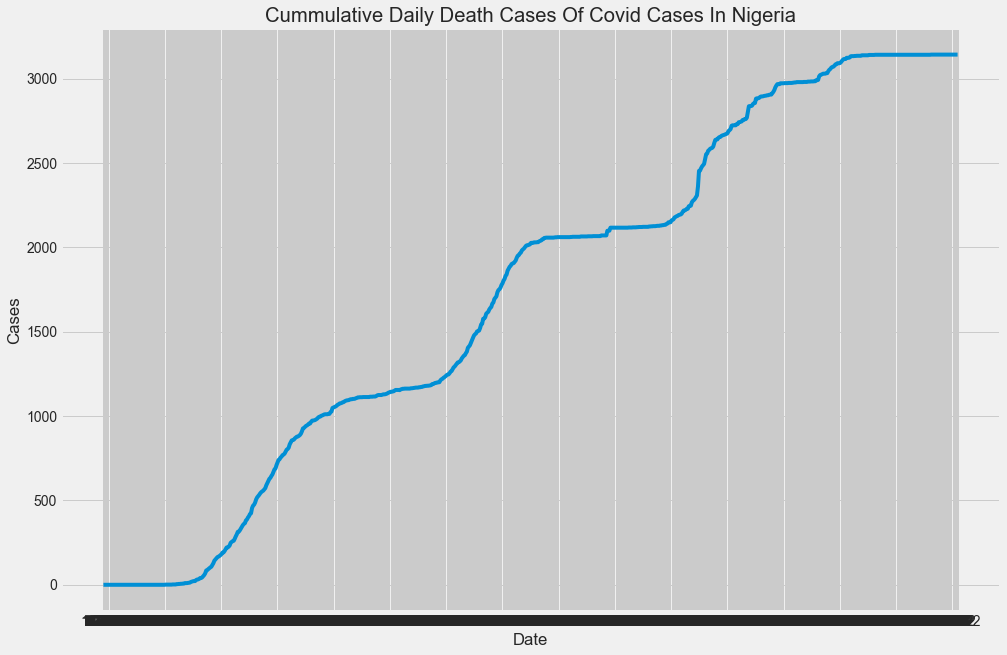

In [151]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(x= 'Date' , y = 'Cases' ,data = Nigeria_daily_death).set_title('Cummulative Daily Death Cases Of Covid Cases In Nigeria')

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [152]:
Nigeria_daily_confirmed['Daily_Infection'] =Nigeria_daily_confirmed[['Cases']].diff()

In [153]:
Nigeria_daily_confirmed.head()

,Date,Cases,Daily_Infection
0,1/22/20,0,NaN
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0


In [154]:
Nigeria_daily_confirmed.tail()

,Date,Cases,Daily_Infection
835,5/6/22,255766,0
836,5/7/22,255766,0
837,5/8/22,255766,0
838,5/9/22,255766,0
839,5/10/22,255802,36


Text(0.5, 1.0, 'Daily Infection Rate Of Covid Cases In Nigeria')

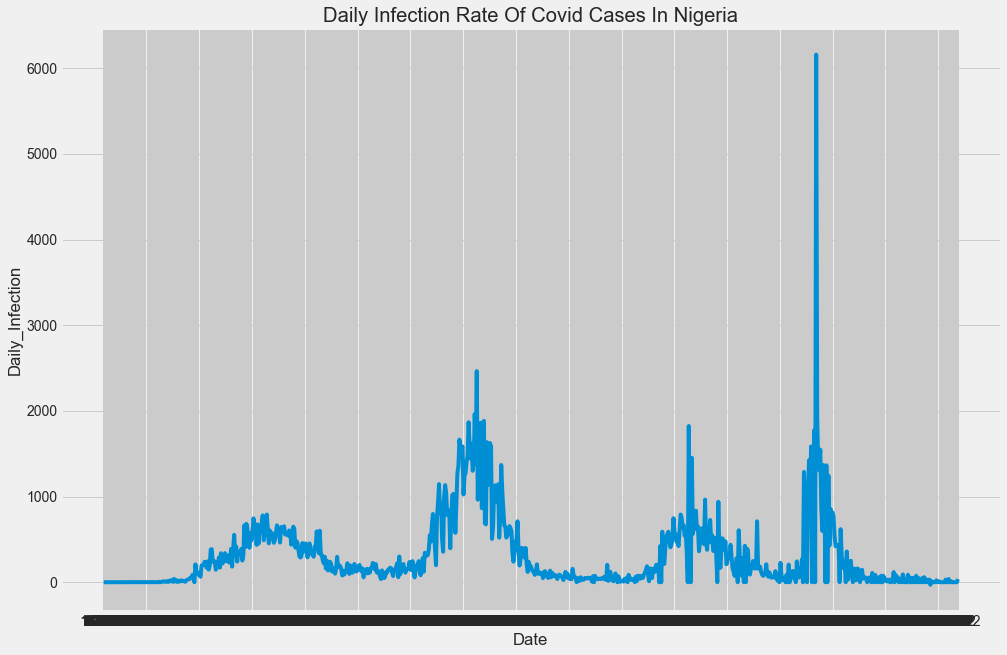

In [155]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(x ='Date' , y = 'Daily_Infection' ,data = Nigeria_daily_confirmed).set_title('Daily Infection Rate Of Covid Cases In Nigeria')

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [156]:
print(Nigeria_daily_confirmed[(Nigeria_daily_confirmed.Daily_Infection)== Nigeria_daily_confirmed.Daily_Infection.max()])

         Date   Cases Daily_Infection
700  12/22/21  231413            6158


* Maximum infection rate for a day is 6158 cases , it happened on 22nd December , 2021

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [157]:
merged_covid = ncdc_covid_data.merge(covid_external , left_on='States Affected' , right_on='states')

In [158]:
merged_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,99378,547,98062,769,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28660,36,28376,248,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16677,32,16491,154,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11278,1,11188,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10253,2,10176,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [159]:
largest_ten = merged_covid.nlargest(10 , 'No. of Cases (Lab Confirmed)')

In [160]:
largest_ten

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,99378,547,98062,769,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28660,36,28376,248,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16677,32,16491,154,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11278,1,11188,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10253,2,10176,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,10224,4,10018,202,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,7694,0,7373,321,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5395,114,5170,111,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5173,315,4749,109,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


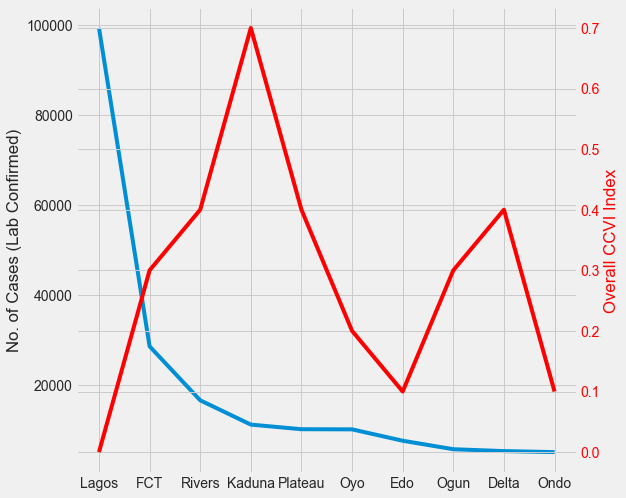

In [161]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot()
ax1.plot(largest_ten.loc[: , 'States Affected'] , largest_ten.loc[: , 'No. of Cases (Lab Confirmed)'])
ax1.set_ylabel('No. of Cases (Lab Confirmed)')

ax2 = ax1.twinx()
ax2.plot(largest_ten.loc[: , 'States Affected'], largest_ten.loc[: , 'Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('Confirmed_CCVI.png')

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

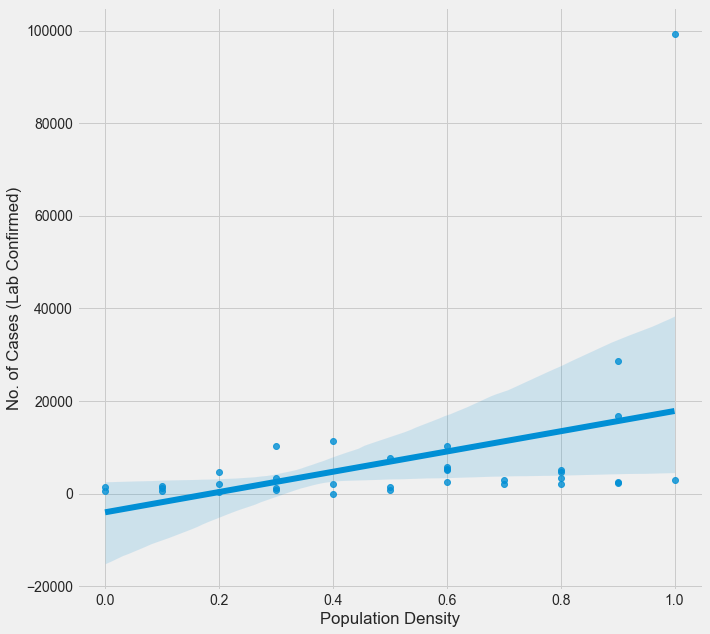

In [162]:
data = plt.subplots(figsize=(10,10))
sns.regplot(y ='No. of Cases (Lab Confirmed)' , x= 'Population Density',  data = merged_covid , fit_reg= True)

##### SUMMARY
The Positive slope above shows that there exist a positive relationship between 
Number of cases confirmed and the population density. This means that the higher the population ,the higher the 
number of cases.

In [163]:
merged_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,99378,547,98062,769,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28660,36,28376,248,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16677,32,16491,154,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11278,1,11188,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10253,2,10176,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

<AxesSubplot:xlabel='No. of Deaths', ylabel='No. of Cases (Lab Confirmed)'>

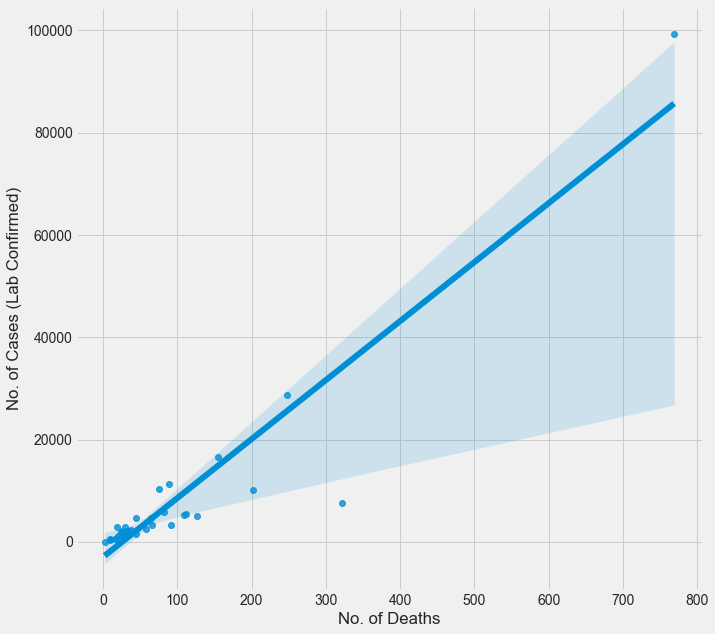

In [164]:
data = plt.subplots(figsize=(10,10))
sns.regplot(y ='No. of Cases (Lab Confirmed)' , x= 'No. of Deaths',  data = merged_covid , fit_reg= True)

#### Summary
The slope above shows a high degree of relationship between the Number of cases and the number of deaths.
This implies that the higher the number of cases , the higher will be the number of deaths.

<AxesSubplot:xlabel='Health System', ylabel='No. of Deaths'>

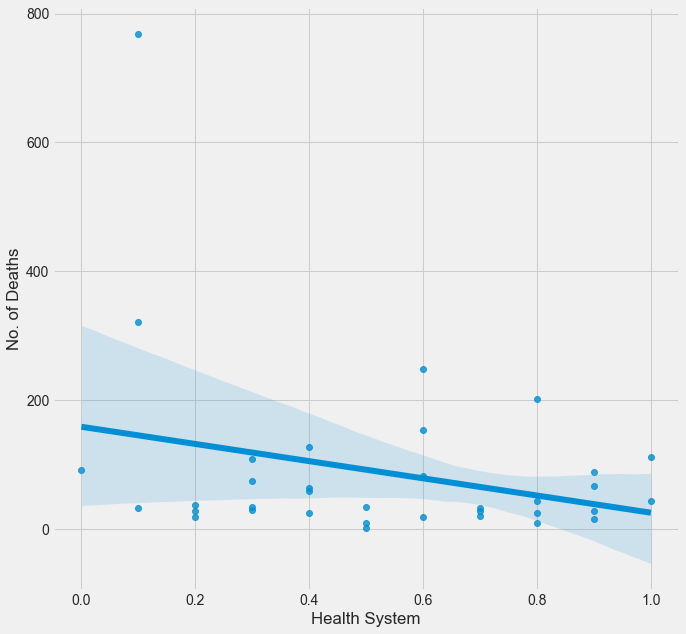

In [165]:
data = plt.subplots(figsize=(10,10))
sns.regplot(y ='No. of Deaths' , x= 'Health System',  data = merged_covid , fit_reg= True)

#### Summary
The picture above shows an inverse relationship between the number of deaths and the status of health system.
This shows that the number of deaths reduces when the health system is better.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [166]:
RealGDP_melt = pd.melt(RealGDP, id_vars =['Year'])

In [167]:
RealGDP_melt.head()

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


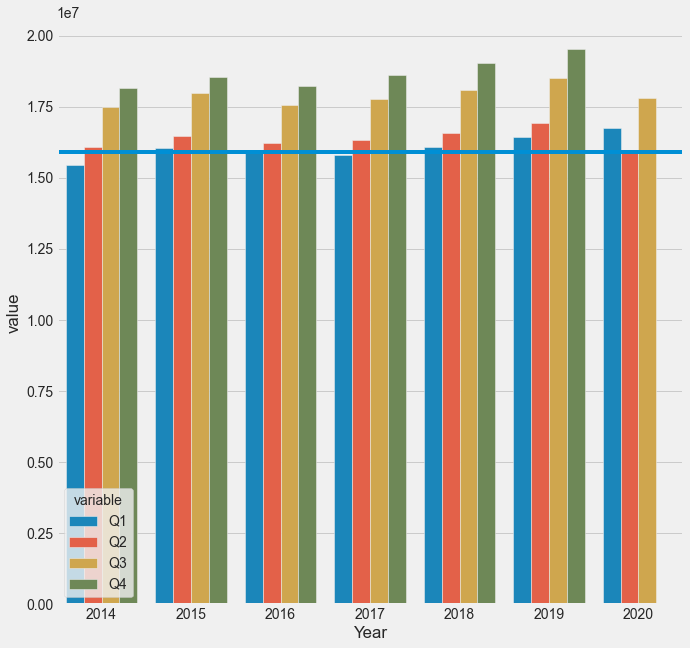

In [168]:
data = plt.subplots(figsize=(10,10))
sns.barplot(x="Year" , y= "value" , hue="variable" ,data=RealGDP_melt).axhline(y=15890000)
plt.legend(loc='lower left', title='variable')

Comparing the Q2 GDP of 2019 with Q2 of 2020 , there is a drastic reduction of GDP between the two quarters.
Also, Q3 GDP of 2019 and Q3 GDP of 2020 shows that there is reduction in GDP.
Since GDP is affected by the rate of overall economic activities in a the country,
The Covid-19 pandemic , coupled with the imposition of lockdown and restriction of international and domestic travel,
has caused a decrease in GDP between the second quarter of 2019 and tthird quarter of 2020,
this implies that Covid-19 pandemic have negative effect on the GDP of Nigeria.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [169]:
merged_covid.sum()

States Affected                 LagosFCTRiversKadunaPlateauOyoEdoOgunDeltaOndo...
No. of Cases (Lab Confirmed)                                               252246
No. of Cases (on admission)                                                  2380
No. Discharged                                                             246787
No. of Deaths                                                                3079
states                          LagosFCTRiversKadunaPlateauOyoEdoOgunDeltaOndo...
region                          South WestNorth CentralSouth SouthNorth WestNo...
Population                                                              209169000
Overall CCVI Index                                                           18.0
Age                                                                          17.9
Epidemiological                                                              17.3
Fragility                                                                    16.9
Health System   

In [170]:
#Adding some new columns to merged_covid dataframe
merged_covid['%cases confirmed'] = merged_covid['No. of Cases (Lab Confirmed)']/252197* 100
merged_covid['%No. of Deaths'] = merged_covid['No. of Deaths']/3079 * 100
merged_covid['case-to-population per million']=merged_covid['No. of Cases (Lab Confirmed)']/merged_covid['Population']*1000000

In [171]:
merged_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,%cases confirmed,%No. of Deaths,case-to-population per million
0,Lagos,99378,547,98062,769,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,39.404910,24.975641,7102.487136
1,FCT,28660,36,28376,248,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,11.364132,8.054563,5891.058582
2,Rivers,16677,32,16491,154,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,6.612688,5.001624,2148.267422
3,Kaduna,11278,1,11188,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,4.471901,2.890549,1222.282432
4,Plateau,10253,2,10176,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4.065473,2.435856,2151.279899


###### Summary from the dataframe merged_covid after some columns were calculated  and added to it
Considering "the percentage number of confirmed cases"  and "the percentage number of deaths" , 
A new column was created to calculate the percentage confirmed cases of each state to the total number of state,
while another column was created for the percentage number of deaths to the total number of death.

* Lagos State has about 39% of the total confirmed cases , 25%[quarter] of the total deaths.
* Abuja has about 11% of total confirmed cases and about 8% of the total deaths.
* Other states also followed a similar trend of having percentage of confirmed cases higher than 
  the percentage death, however , some states such as Rivers , Edo , kano ,Delta,Katsina and some few states have 
  a higher percentage of deaths than percentage confirmed cases.


###### Also, a new column was created to calculate the number of confirmed cases per million people.
* Lagos lead with about 7101 confirmed cases per one million persons.
* Abuja has about 5889 confirmed cases to one million person
* Plateau followed with 2151 confirmed cases per million, 
* This makes Lagos , Abuja and Plateau state the highest interms of cases confirmed per million.
* While Kogi state has 1 confirmed case per million , the least confirmed-cases-per-milion



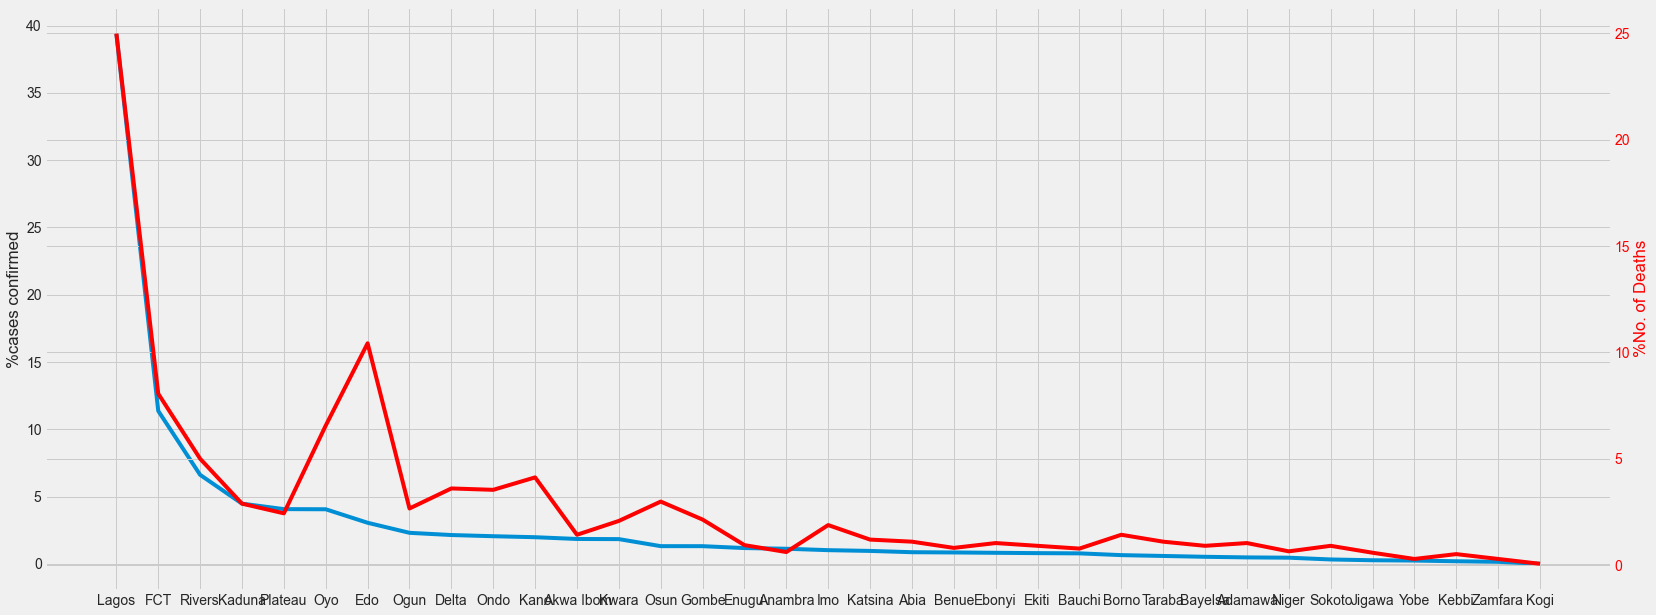

In [172]:
#PLOT OF "percentage number of confirmed cases to total number of confirmed cases" and
#        "Percentage number of death of each state to the overall number of deaths" on the same axis
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot()
ax1.plot(merged_covid.loc[: , 'States Affected'] , merged_covid.loc[: , '%cases confirmed'])
ax1.set_ylabel('%cases confirmed')

ax2 = ax1.twinx()
ax2.plot(merged_covid.loc[: , 'States Affected'], merged_covid.loc[: , '%No. of Deaths'], 'r-')
ax2.set_ylabel('%No. of Deaths', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('% CONFIRMED VS % DEATH.png')

* The regression plot of number of cases confirmed and the number of deaths shows a positive relationship.
That is , The higher the number of cases, the higher the number of deaths.
However the lineplots of "percentage number of confirmed cases to total number of confirmed cases" and
"Percentage number of death of each state to the overall number of deaths" on the same axis shows a similar trend,
but some states such as Oyo , Edo have a disturbing outlier spike in the percentage number of deaths,  Kano ,Osun , Imo , Borno also showed spikes in the percentage number of deaths, this is expected to be caused by some other factors.

In [173]:
Budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [174]:
Budget_data['decrease_in_budget'] = Budget_data['Initial_budget (Bn)'] - Budget_data['Revised_budget (Bn)']

In [175]:
Budget_data['% decrease_in_budget'] = Budget_data['decrease_in_budget']/Budget_data['Initial_budget (Bn)'] *100

In [176]:
Budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),decrease_in_budget,% decrease_in_budget
0,Abia,136.60,102.70,33.90,24.816984
1,Adamawa,183.30,139.31,43.99,23.998909
2,Akwa-Ibom,597.73,366.00,231.73,38.768340
3,Anambra,137.10,112.80,24.30,17.724289
4,Bauchi,167.20,128.00,39.20,23.444976
5,Bayelsa,242.18,183.15,59.03,24.374432
6,Benue,189.00,119.00,70.00,37.037037
7,Borno,146.80,108.80,38.00,25.885559
8,Cross River,1100.00,147.10,952.90,86.627273
9,Delta,395.50,282.30,113.20,28.621997


In [177]:
Budget_data.sort_values('decrease_in_budget' , ascending = False)

,states,Initial_budget (Bn),Revised_budget (Bn),decrease_in_budget,% decrease_in_budget
8,Cross River,1100.00,147.10,952.90,86.627273
23,Lagos,1680.00,920.50,759.50,45.208333
2,Akwa-Ibom,597.73,366.00,231.73,38.768340
31,Rivers,530.80,300.40,230.40,43.406179
26,Ogun,449.90,280.00,169.90,37.763948
9,Delta,395.50,282.30,113.20,28.621997
15,Imo,197.60,108.30,89.30,45.192308
36,FCT,278.78,199.00,79.78,28.617548
21,Kogi,176.00,102.00,74.00,42.045455
6,Benue,189.00,119.00,70.00,37.037037


#### Insight from Budget Data
The negative impact of Covid-19 on all states in Nigeria is much to the extent that the state with the least decrease in budget,
Katsina state, has a reduction in budget to the extent of 31 billion Naira, that is about 13 percent decrease.
The list of the first five states most affected by budget reduction due to covid-19 are: 
Cross-river , Lagos ,Akwa Ibom , Rivers  and Ogun State
* Cross-River was reduced by 952.9 billion Naira ,which is about 87% budget reduction ,
* Lagos State downwardly revised its budget by 759.5 billion Naira , that is 45.2%reduction,
* Imo state's budget was reduced by 231.73 billion Naira , which amount to 38.76 % reduction in their budget.